# Пример работы с данными Мосбиржи 

## Получение списка акций из индекса Мосбиржи

In [1]:
import pandas as pd
file = 'metadata/stock-index-base.xlsx'

In [2]:
xls = pd.ExcelFile(file)
sheets = xls.sheet_names

In [4]:
# Пытаемся преобразовать каждый элемент в дату
date_sheets = []
for s in sheets:
    try:
        dt = pd.to_datetime(s, format="%d.%m.%Y", errors="raise")
        date_sheets.append(s)
    except Exception:
        pass  # если не дата, пропускаем

print(date_sheets)

['20.06.2025', '21.03.2025', '20.12.2024', '03.12.2024', '25.11.2024', '14.10.2024', '20.09.2024', '21.06.2024', '22.03.2024', '27.02.2024', '22.12.2023', '22.09.2023', '16.06.2023', '17.03.2023', '16.12.2022', '16.09.2022', '30.06.2022', '17.06.2022', '17.12.2021', '17.09.2021', '18.06.2021', '19.03.2021', '18.12.2020', '18.09.2020', '19.06.2020', '20.03.2020', '20.12.2019', '20.09.2019', '21.06.2019', '22.03.2019', '21.12.2018', '21.09.2018', '22.06.2018', '16.03.2018', '22.12.2017', '22.09.2017', '16.06.2017', '17.03.2017', '16.12.2016', '16.09.2016', '16.06.2016', '16.03.2016', '16.12.2015', '16.09.2015', '16.06.2015', '17.03.2015', '20.01.2015', '16.12.2014', '16.09.2014', '17.06.2014', '18.03.2014', '17.12.2013', '17.09.2013', '18.06.2013', '18.03.2013', '18.12.2012']


In [6]:
# читаем все листы в один DataFrame
all_data = []
for sheet in date_sheets:
    df = pd.read_excel(file, sheet_name=sheet, skiprows=3)
    df["date"] = pd.to_datetime(sheet, format="%d.%m.%Y")  # колонка с датой
    all_data.append(df)

moex_all = pd.concat(all_data, ignore_index=True)

In [12]:
import re
import numpy as np

unique_codes  = moex_all["Code"].unique()
# убираем NaN
codes = [c for c in unique_codes if isinstance(c, str)]

# оставляем только тикеры: заглавные латиницей, без пробелов и спецсимволов
ticker_pattern = re.compile(r'^[A-Z]{1,6}$')

tickers = [c for c in codes if ticker_pattern.match(c)]

print(sorted(tickers))

['AFKS', 'AFLT', 'AGRO', 'AKRN', 'ALRS', 'ASTR', 'BANE', 'BANEP', 'BSPB', 'CBOM', 'CHMF', 'DIXY', 'DSKY', 'ENPG', 'EONR', 'EPLN', 'FEES', 'FIVE', 'FIXP', 'FLOT', 'GAZP', 'GCHE', 'GLTR', 'GMKN', 'HEAD', 'HHRU', 'HYDR', 'IRAO', 'KMAZ', 'LEAS', 'LKOH', 'LNTA', 'LSRG', 'MAGN', 'MAIL', 'MDMG', 'MFON', 'MGNT', 'MOEX', 'MRKH', 'MSNG', 'MSRS', 'MSTT', 'MTLR', 'MTLRP', 'MTSS', 'MVID', 'NKNC', 'NLMK', 'NMTP', 'NVTK', 'OGKB', 'OZON', 'PGIL', 'PHOR', 'PHST', 'PIKK', 'PLZL', 'POGR', 'POLY', 'POSI', 'QIWI', 'RASP', 'RENI', 'RNFT', 'ROSN', 'RSTI', 'RTKM', 'RTKMP', 'RUAL', 'RUALR', 'SBER', 'SBERP', 'SELG', 'SFIN', 'SGZH', 'SMLT', 'SNGS', 'SNGSP', 'SVAV', 'SVCB', 'T', 'TATN', 'TATNP', 'TCSG', 'TNBPP', 'TRMK', 'TRNFP', 'UGLD', 'UPRO', 'URKA', 'UWGN', 'VKCO', 'VSMO', 'VTBR', 'VZRZ', 'YDEX', 'YNDX']


In [16]:
import moex_utils as moex
import pyarrow

In [14]:
start = '2000-01-01'
end = '2026-01-01'


In [17]:
for ticker in tickers:
    print(f"Saving data for ticker: {ticker}")
    moex.save_moex_stock(ticker, start, end)

Saving data for ticker: LKOH
[INFO] LKOH: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] LKOH: 5,544 rows → data\LKOH\LKOH.parquet
Saving data for ticker: GAZP
[INFO] GAZP: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] GAZP: 4,944 rows → data\GAZP\GAZP.parquet
Saving data for ticker: SBER
[INFO] SBER: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] SBER: 4,572 rows → data\SBER\SBER.parquet
Saving data for ticker: TATN
[INFO] TATN: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] TATN: 5,962 rows → data\TATN\TATN.parquet
Saving data for ticker: T
[INFO] T: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] T: 1,473 rows → data\T\T.parquet
Saving data for ticker: NVTK
[INFO] NVTK: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] NVTK: 4,798 rows → data\NVTK\NVTK.parquet
Saving data for ticker: YDEX
[INFO] YDEX: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] YDEX: 314 rows → data\YDEX\YDEX.parquet
Saving data for ticker: GMKN
[INFO] GMKN: fetching 2000-01-01 → 2026-01-01, freq=24
[OK] GMKN: 4,705

In [18]:
moex.save_moex_stock(ticker, start, end)

In [3]:
moex.update_moex_stock(ticker)

Updated data for ticker: SBER from 2023-01-31 to 2025-03-25


In [16]:
ticker = 'VKCO'

In [17]:
df = moex.read_moex_stock(ticker)


Loaded data for ticker: VKCO from local file.


In [20]:
df

,open,close,high,low,value_rub,volume,ticker
date,,,,,,,
2021-12-14,914.4,897.4,950.0,842.8,1.565151e+09,1784849.0,VKCO
2021-12-15,900.0,961.0,973.8,883.6,2.107221e+09,2234113.0,VKCO
2021-12-16,966.0,982.8,1019.0,951.4,2.416471e+09,2446405.0,VKCO
2021-12-17,983.0,962.0,1002.2,940.0,1.057160e+09,1109841.0,VKCO
2021-12-20,957.2,912.0,957.8,891.0,1.037948e+09,1132410.0,VKCO
...,...,...,...,...,...,...,...
2025-03-19,326.6,328.1,332.2,322.2,9.184798e+08,2808057.0,VKCO
2025-03-20,328.5,301.5,333.4,298.6,1.142810e+10,36901572.0,VKCO
2025-03-21,300.6,294.4,301.5,290.4,6.437010e+09,21807313.0,VKCO


In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

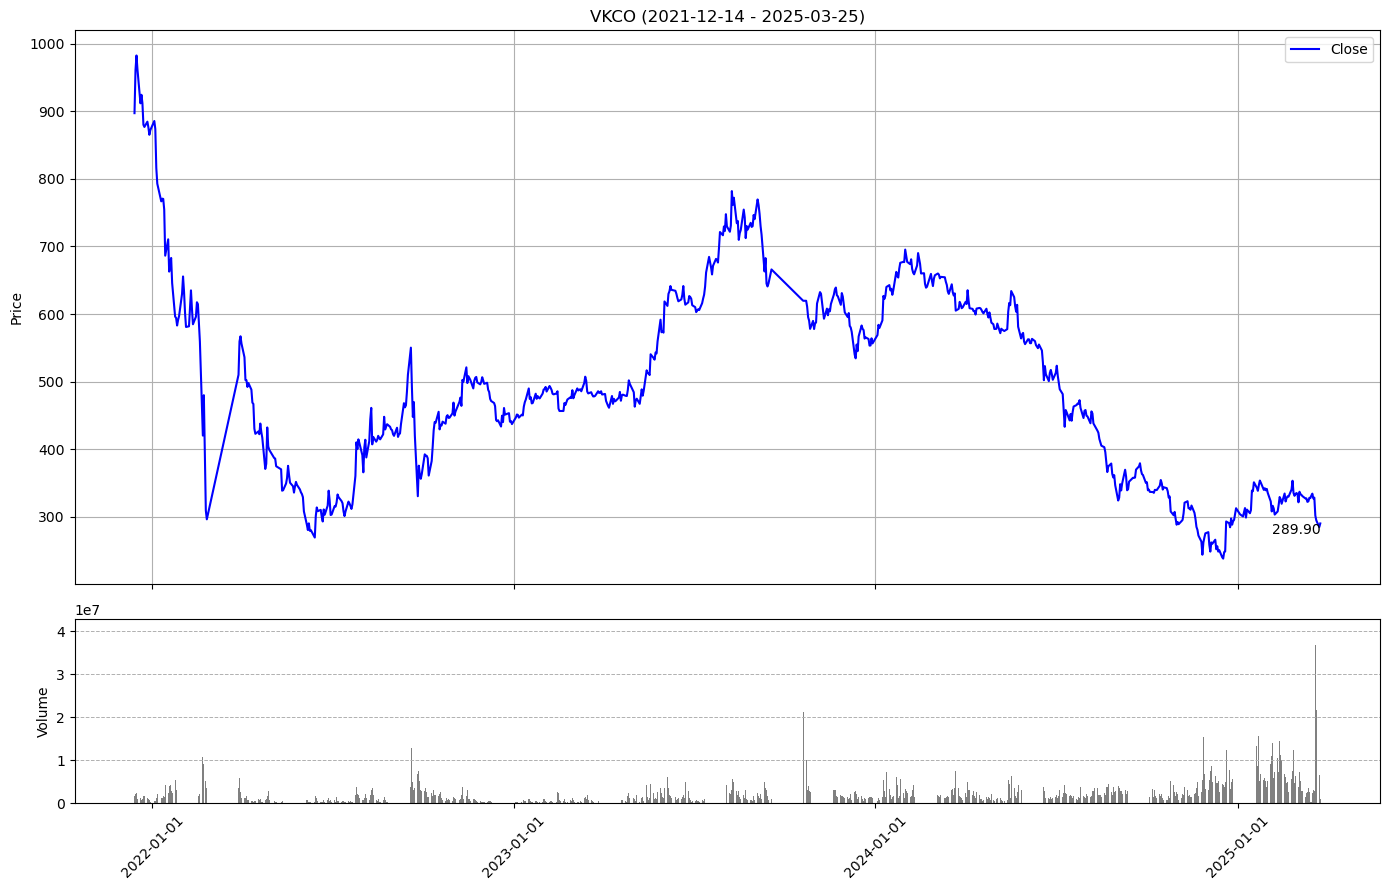

In [26]:
 # Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 9), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Candlestick representation (high-low line)
ax1.plot(df.index, df['close'], label='Close', color='blue')
ax1.set_ylabel('Price')
start_date = df.index.min().strftime('%Y-%m-%d')
end_date = df.index.max().strftime('%Y-%m-%d')
ax1.set_title(f"{ticker} ({start_date} - {end_date})")
ax1.text(df.index[-1], df['close'].iloc[-1] - 20, f'{df["close"].iloc[-1]:.2f}', 
         fontsize=10, color='black', ha='right', va='bottom')
ax1.legend()
ax1.grid()

# Volume bar plot
ax2.bar(df.index, df['volume'], width=0.8, color='gray')
ax2.set_ylabel('Volume')
ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
ax2.xaxis.set_major_locator(mdates.YearLocator())

# Formatting date on x-axis
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Собрать все данные в один датасет 

In [3]:
# Combine all stock data
combined_stocks = moex.combine_moex_stocks()

# Display basic information about the combined dataset
print("\nDataset Info:")
print(combined_stocks.info())

# Show first few rows
print("\nFirst few rows:")
print(combined_stocks.head())

# Basic statistics
print("\nBasic statistics:")
print(combined_stocks.describe())

Loaded data for AFKS
Loaded data for AFLT
Loaded data for ALRS
Loaded data for ASTR
Loaded data for BSPB
Loaded data for CBOM
Loaded data for CHMF
Loaded data for ENPG
Loaded data for FEES
Loaded data for FLOT
Loaded data for GAZP
Loaded data for GMKN
Loaded data for HEAD
Loaded data for HYDR
Loaded data for IRAO
Loaded data for LEAS
Loaded data for LKOH
Loaded data for MAGN
Loaded data for MGNT
Loaded data for MOEX
Loaded data for MSNG
Loaded data for MTLR
Loaded data for MTLRP
Loaded data for MTSS
Loaded data for NLMK
Loaded data for NVTK
Loaded data for PHOR
Loaded data for PIKK
Loaded data for PLZL
Loaded data for POSI
Loaded data for ROSN
Loaded data for RTKM
Loaded data for RUAL
Loaded data for SBER
Loaded data for SBERP
Loaded data for SELG
Loaded data for SMLT
Loaded data for SNGS
Loaded data for SNGSP
Loaded data for SVCB
Loaded data for T
Loaded data for TATN
Loaded data for TATNP
Loaded data for TRNFP
Loaded data for UGLD
Loaded data for UPRO
Loaded data for VKCO
Loaded data

In [4]:
combined_stocks

,open,close,high,low,value_rub,volume,ticker
date,,,,,,,
2007-12-12,43.000,41.449,43.00,41.000,1.922004e+07,465200.0,AFKS
2007-12-13,41.200,40.896,41.20,40.000,2.383380e+07,585400.0,AFKS
2007-12-14,40.985,41.797,42.35,40.000,5.323530e+07,1284700.0,AFKS
2007-12-17,41.890,41.900,43.00,41.101,5.369148e+07,1276500.0,AFKS
2007-12-18,41.001,41.400,42.89,41.000,3.428903e+07,817900.0,AFKS
...,...,...,...,...,...,...,...
2025-03-19,4611.000,4641.000,4654.50,4595.500,1.992886e+09,430658.0,YDEX
2025-03-20,4641.000,4646.000,4673.50,4566.500,2.919371e+09,630477.0,YDEX
2025-03-21,4654.500,4625.000,4699.00,4611.000,2.104260e+09,452249.0,YDEX


Loaded data for AFKS
Loaded data for AFLT
Loaded data for ALRS
Loaded data for ASTR
Loaded data for BSPB
Loaded data for CBOM
Loaded data for CHMF
Loaded data for ENPG
Loaded data for FEES
Loaded data for FLOT
Loaded data for GAZP
Loaded data for GMKN
Loaded data for HEAD
Loaded data for HYDR
Loaded data for IRAO
Loaded data for LEAS
Loaded data for LKOH
Loaded data for MAGN
Loaded data for MGNT
Loaded data for MOEX
Loaded data for MSNG
Loaded data for MTLR
Loaded data for MTLRP
Loaded data for MTSS
Loaded data for NLMK
Loaded data for NVTK
Loaded data for PHOR
Loaded data for PIKK
Loaded data for PLZL
Loaded data for POSI
Loaded data for ROSN
Loaded data for RTKM
Loaded data for RUAL
Loaded data for SBER
Loaded data for SBERP
Loaded data for SELG
Loaded data for SMLT
Loaded data for SNGS
Loaded data for SNGSP
Loaded data for SVCB
Loaded data for T
Loaded data for TATN
Loaded data for TATNP
Loaded data for TRNFP
Loaded data for UGLD
Loaded data for UPRO
Loaded data for VKCO
Loaded data

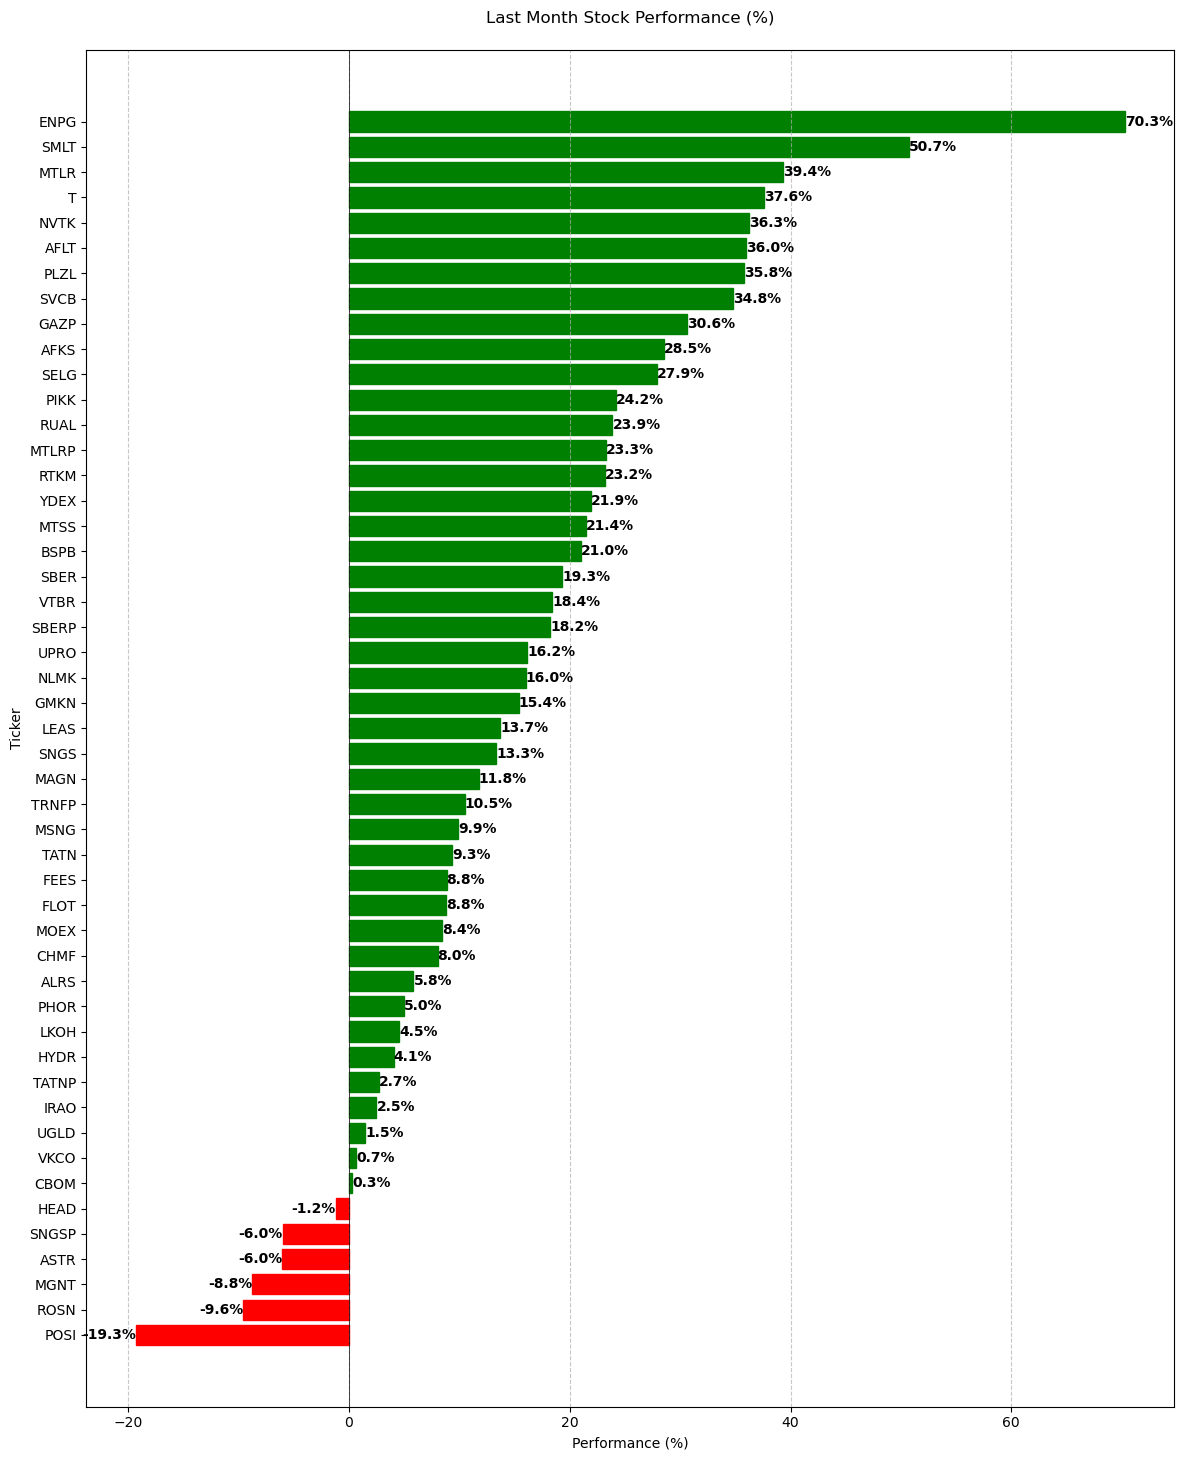


Performance Summary:
   ticker  performance  first_price   last_price start_date   end_date
7    ENPG    70.275258    325.15000    553.65000 2024-12-26 2025-03-25
36   SMLT    50.740741    945.00000   1424.50000 2024-12-26 2025-03-25
21   MTLR    39.354411     90.46000    126.06000 2024-12-26 2025-03-25
40      T    37.596161   2625.80000   3613.00000 2024-12-26 2025-03-25
25   NVTK    36.260265    949.80000   1294.20000 2024-12-26 2025-03-25
1    AFLT    35.955669     55.04000     74.83000 2024-12-26 2025-03-25
28   PLZL    35.826012  14001.00000  19017.00000 2024-12-26 2025-03-21
39   SVCB    34.819145     13.68500     18.45000 2024-12-26 2025-03-25
10   GAZP    30.640712    126.89000    165.77000 2024-12-26 2025-03-25
0    AFKS    28.515653     14.08700     18.10400 2024-12-26 2025-03-25
35   SELG    27.889635     40.23000     51.45000 2024-12-26 2025-03-25
27   PIKK    24.188857    446.90000    555.00000 2024-12-26 2025-03-25
32   RUAL    23.869801     33.18000     41.10000 2024-1

In [14]:
def plot_stocks_performance():
    """
    Calculates last month's performance for each stock and creates a horizontal bar chart.
    Performance is calculated as percentage change between the last prices of the first and last days.
    """
    import matplotlib.pyplot as plt
    
    # Get combined dataset
    combined_df = moex.combine_moex_stocks()
    
    # Get current date and date 1 month ago
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.DateOffset(months=3)
    
    # Calculate performance for each stock
    performances = []
    
    for ticker in combined_df['ticker'].unique():
        # Get data for specific ticker
        stock_data = combined_df[combined_df['ticker'] == ticker]
        
        # Filter for last month and sort by date
        mask = (stock_data.index >= start_date) & (stock_data.index <= end_date)
        monthly_data = stock_data[mask].sort_index()
        
        if len(monthly_data) >= 2:  # Check if we have at least 2 data points
            # Get first and last day prices
            first_day = monthly_data.index.min()
            last_day = monthly_data.index.max()
            
            first_price = monthly_data.loc[first_day, 'close']
            last_price = monthly_data.loc[last_day, 'close']
            
            # Calculate performance
            performance = ((last_price - first_price) / first_price) * 100
            performances.append({
                'ticker': ticker,
                'performance': performance,
                'first_price': first_price,
                'last_price': last_price,
                'start_date': first_day,
                'end_date': last_day
            })
    
    # Create DataFrame with performances and sort
    perf_df = pd.DataFrame(performances)
    perf_df = perf_df.sort_values('performance', ascending=True)
    
    # Create horizontal bar chart
    plt.figure(figsize=(12, max(8, len(perf_df) * 0.3)))  # Adjust height based on number of stocks
    
    # Create horizontal bars
    bars = plt.barh(perf_df['ticker'], perf_df['performance'])
    
    # Customize the chart
    plt.title('Last Month Stock Performance (%)', pad=20)
    plt.xlabel('Performance (%)')
    plt.ylabel('Ticker')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Add value labels on the bars
    for bar in bars:
        width = bar.get_width()
        x_pos = width if width >= 0 else width
        plt.text(x_pos, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%',
                ha='left' if width >= 0 else 'right', 
                va='center',
                fontweight='bold')
    
    # Color bars based on performance
    for bar in bars:
        if bar.get_width() >= 0:
            bar.set_color('green')
        else:
            bar.set_color('red')
    
    # Add zero line
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Print detailed performance data
    print("\nPerformance Summary:")
    summary_df = perf_df[['ticker', 'performance', 'first_price', 'last_price', 'start_date', 'end_date']]
    print(summary_df.sort_values('performance', ascending=False).to_string())
    
    return perf_df

# Usage
performance_data = plot_stocks_performance()